# nd:YAG Laser

## initial imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString as ls
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
import scipy.constants as con
import csv
import math

In [2]:
# signifikanztest

def ttest(werte,unsicherheiten):
    for i,(v1, uv1) in enumerate(zip(werte,unsicherheiten)):
        # print(i,end = '\t')
        for j,(v2, uv2) in enumerate(zip(werte, unsicherheiten)):
            d = abs(v1-v2)
            ud = np.sqrt(uv1**2 + uv2**2)
            t = d/ud
            print(round(t,3), end = '\t')
        print()

def prob(x):
    return np.exp(-x**2/2)/np.sqrt(2*con.pi)


def ttestPaussen(werte,unsicherheiten):
    for i,(v1, uv1) in enumerate(zip(werte,unsicherheiten)):
        for j,(v2, uv2) in enumerate(zip(werte, unsicherheiten)):
            d = abs(v1-v2)
            ud = np.sqrt(uv1**2 + uv2**2)
            t = d/ud
            P = quad(prob,-t,t)
            # print(round((P[0])*100,3), end = '\t')
            print(f"\SI{{{round((P[0])*100,3)}}}" + r"{\percent}", end = '\t')
            # print(P, end = '\t')
        print()
def ttestPinnen(werte,unsicherheiten):
    for i,(v1, uv1) in enumerate(zip(werte,unsicherheiten)):
        for j,(v2, uv2) in enumerate(zip(werte, unsicherheiten)):
            d = abs(v1-v2)
            ud = np.sqrt(uv1**2 + uv2**2)
            t = d/ud
            P = quad(prob,-t,t)
            # print(round((1-P[0])*100,3), end = '\t')
            print(f"\SI{{{round((1-P[0])*100,3)}}}" + r"{\percent}", end = '\t')
            # print(P, end = '\t')
        print()
# normalize
def normalize(arr, t_min, t_max):
    arr = arr.to_numpy()
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
def simple_norm(arr):
    arr = arr.to_numpy()
    norm_arr = []
    diff = 1
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr)
        norm_arr.append(temp)
    return norm_arr


## spiking

In [3]:
spk25 = pd.read_csv("ndYAK-Laser/data/spiking/250mA.csv",skiprows=1)
spk3 = pd.read_csv("ndYAK-Laser/data/spiking/300mA.csv",skiprows=1)
spk25,spk3

(      Sequence  Volt  Volt.1  -4.450000e-03  5.000000e-06
 0            0 -2.76   -0.48            NaN           NaN
 1            1 -2.76   -0.48            NaN           NaN
 2            2 -2.76   -0.48            NaN           NaN
 3            3 -2.76   -0.48            NaN           NaN
 4            4 -2.76   -0.46            NaN           NaN
 ...        ...   ...     ...            ...           ...
 1195      1195 -2.70   -0.48            NaN           NaN
 1196      1196 -2.76   -0.48            NaN           NaN
 1197      1197 -2.76   -0.48            NaN           NaN
 1198      1198 -2.70   -0.46            NaN           NaN
 1199      1199 -2.70   -0.46            NaN           NaN
 
 [1200 rows x 5 columns],
       Sequence  Volt  Volt.1  -4.450000e-03  5.000000e-06
 0            0 -2.76   -0.70            NaN           NaN
 1            1 -2.76   -0.70            NaN           NaN
 2            2 -2.76   -0.68            NaN           NaN
 3            3 -2.76   -0.6

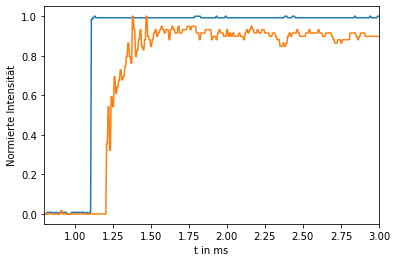

In [4]:
plt.plot(spk25['Sequence']*	5e-3,simple_norm(spk25['Volt']))
plt.plot(spk25['Sequence']*	5e-3,simple_norm(spk25['Volt.1']))
plt.xlim(0.8,3)
plt.xlabel('t in ms')
plt.ylabel('Normierte Intensität')
plt.savefig("ndYAK-Laser/output/spk25.svg")

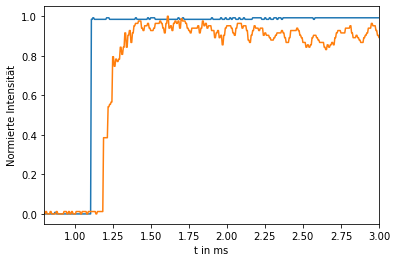

In [5]:
plt.plot(spk3['Sequence']*5e-3,simple_norm(spk3['Volt']))
plt.plot(spk3['Sequence']*5e-3,simple_norm(spk3['Volt.1']))
plt.xlim(0.8,3)
plt.xlabel('t in ms')
plt.ylabel('Normierte Intensität')
plt.savefig("ndYAK-Laser/output/spk3.svg")

## lifetime

In [6]:
lt = pd.read_csv("ndYAK-Laser/data/lifetime/lifetime-mit-verstärker.csv",skiprows=1)
re_spannung=simple_norm(lt['Volt'])
lt_intensitaet=simple_norm(lt['Volt.1'])

120    4.80
121    4.80
122   -2.76
123   -2.76
124   -2.76
       ... 
787   -2.82
788   -2.82
789   -2.82
790    4.80
791    4.80
Name: Volt, Length: 672, dtype: float64

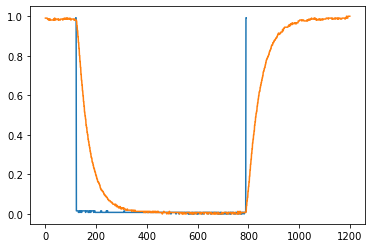

In [7]:
c,d = 120,792
plt.plot(lt['Sequence'][c:d],re_spannung[c:d])
plt.plot(lt['Sequence'],lt_intensitaet)
lt['Volt'][c:d]

In [8]:
offlength = 790 - 120
timeinterval = 1 / (150* 2* offlength)
timeinterval

4.975124378109453e-06

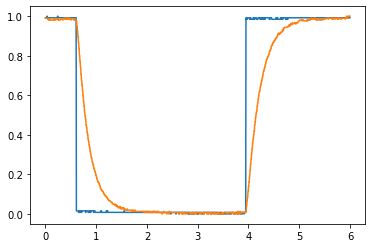

In [9]:
timeinterval = 5e-6
plt.plot(lt['Sequence']*timeinterval*1e3,re_spannung)
plt.plot(lt['Sequence']*timeinterval*1e3,lt_intensitaet)

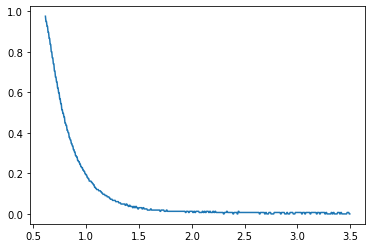

In [10]:
a,b = 123, 700
plt.plot(lt['Sequence'][a:b]*timeinterval*1e3,lt_intensitaet[a:b])

[4.62506284e+01 1.00650689e+00 5.88044247e-03] [0.10964759 0.00150148 0.00026346]
0.23125314195893448 \pm 0.0005482379647833733 ms


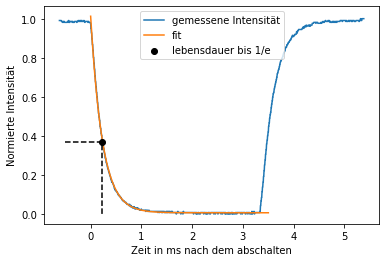

In [11]:
x,y = lt['Sequence'][a:b]-a,lt_intensitaet[a:b]
plt.plot((lt['Sequence']-a)*timeinterval*1e3,lt_intensitaet,label="gemessene Intensität")
def fit(x,T,a,c):
    return a*np.exp(-x/T) + c

c, cov = curve_fit(fit,x,y)
perr = np.sqrt(np.diag(cov))
print(c,perr)
T = c[0]*timeinterval*1e3
uT =perr[0]*timeinterval*1e3
print(f"{T} \pm {uT} ms")

x1 = np.linspace(0,700,500)
y1 = fit(x1, c[0],c[1],c[2])
plt.plot(x1*timeinterval*1e3,y1,label="fit")
plt.scatter(c[0]*timeinterval*1e3,1/math.e,c="k",zorder=5,label="lebensdauer bis 1/e")
plt.plot([-.5,T,T],[1/math.e,1/math.e,0],c="k", ls='--')
plt.xlabel('Zeit in ms nach dem abschalten')
plt.ylabel('Normierte Intensität')
plt.legend()
plt.savefig("ndYAK-Laser/output/lifetime.svg")

## Laserausgangsleistung

In [12]:
leistung = pd.read_csv("ndYAK-Laser/data/ausgangsleistung.tsv",sep='\t',decimal=",")
leistung

,pumplaser mA,T in celsius,uT,laser mW
0,300,26.7,0.25,0.8
1,325,26.4,0.25,1.2
2,350,25.8,0.25,1.7
3,375,25.0,0.25,2.5
4,400,24.6,0.20,3.6
5,425,24.2,0.15,4.5
6,450,23.9,0.10,5.4
7,475,23.3,0.10,6.4
8,500,23.0,0.10,7.6


Text(0, 0.5, 'Leistung Ausgangslaser in mW')

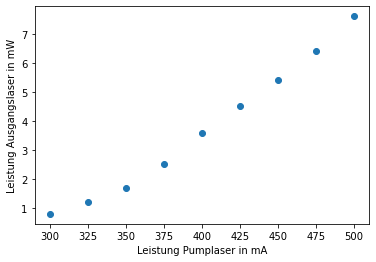

In [13]:
plt.scatter(leistung['pumplaser mA'],leistung['laser mW'])
plt.xlabel('Leistung Pumplaser in mA')
plt.ylabel('Leistung Ausgangslaser in mW')

[ 0.0348     -4.95555557] [0.00164256 0.42410607]
Pmin = 142.4010218395636


Text(0, 0.5, 'Leistung Ausgangslaser in mW')

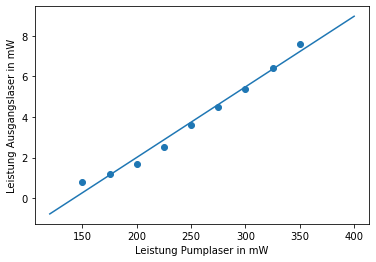

In [14]:
# m = 1 mW/mA bei 400 bis 500mA
# aber 0 mW bei ca. 150 mA
x,y = leistung['pumplaser mA']-150,leistung['laser mW']
plt.scatter(x,y)

def lin_fit(x,m,c):
    return m*x + c

c, cov = curve_fit(lin_fit,x,y)
perr = np.sqrt(np.diag(cov))
print(c,perr)

x1 = np.linspace(120,400,500)
y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,label="fit")


Pmin = - c[1] / c[0]
B =  c[1]
# uPmin =
print(f"Pmin = {Pmin}")

plt.xlabel('Leistung Pumplaser in mW')
plt.ylabel('Leistung Ausgangslaser in mW')

In [15]:
eta0 = -B/Pmin * (1064/808)
eta0*100

4.582574262885577

Text(0, 0.5, 'quantenausbeute $\\eta$')

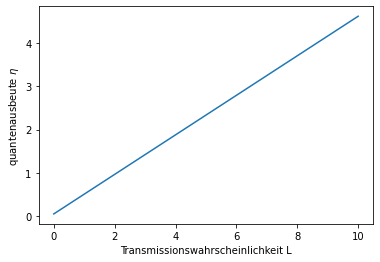

In [16]:
T = 0.1
x = np.linspace(0,10,500)
y = -B/Pmin * (1064/808) * (T+x)/T
plt.plot(x,y)
plt.xlabel("Transmissionswahrscheinlichkeit L")
plt.ylabel("quantenausbeute $\eta$")